In [1]:
Complement =  {"A":"T", "T":"A","G":"C","C":"G"}
def reverse_complement(seq):
    """ Swaps Guanine with cytosine and Adenine with thymine and vice versa. Then reverses the string"""
    string = ''
    for nuc in seq:
        string += Complement[nuc]
    return string[::-1]

In [12]:
file = open(r"D:\Summers\BSE322\Algorithms-DNA-Sequencing-master\1_week\lambda_virus.fa",'r')
file.readline().replace("\n","")
genome = file.read().replace("\n","")
#print(genome)

In [60]:
from collections import Counter
import collections
count = Counter(genome)
print(count)

Counter({'G': 12820, 'A': 12334, 'T': 11986, 'C': 11362})


In [14]:
def naive(seq, sub_seq):
    """ searches for all occurences of subsequence(text) in a given sequence"""
    occurences = []
    for i in range(0,len(seq) - len(sub_seq) + 1):
        match = True
        for j in range(len(sub_seq)):
            if not seq[i+j] == sub_seq[j]:
                match = False
                break
        if match:
            occurences.append(i)
    return occurences

In [16]:
question1 = '''1. How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?
E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.'''
#print(question1)

In [19]:
n = len(naive(genome, 'AGGT')) + len(naive(genome, "ACCT"))
print(n)

306


In [20]:
question2 = '''2. How many times does TTAA or its reverse complement occur in the labda virus genome?
Hint: TTAA and its reverse complement are equal, so remember to not double count'''
#print(question2)

In [21]:
n = len(naive(genome, 'TTAA'))
print(n)

195


In [22]:
question3 = '''What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement
in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based)
and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.'''

In [23]:
occurences1 = naive(genome, 'ACTAAGT')
occurences2 = naive(genome, reverse_complement('ACTAAGT'))
ans = min(occurences1[0],occurences2[0])
print(ans)

26028


In [24]:
question4 = '''What is the offset of the leftmost occurrence of AGTCGA or its reverse complement
in the Lambda virus genome?'''

In [26]:
occurences1 = naive(genome, 'AGTCGA')
occurences2 = naive(genome, reverse_complement('AGTCGA'))
print("occurences1 : %d occurences2 : %d" % (occurences1[0],occurences2[0]))
ans = min(occurences1[0],occurences2[0])
print(ans)

occurences1 : 18005 occurences2 : 450
450


In [27]:
question5 = '''As we will discuss, sometimes we would like to find approximate matches for P in T.
That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm
that allows up to 2 mismatches per occurrence. Unlike for the previous questions,
do not consider the reverse complement here. We're looking for approximate matches for P itself,
not its reverse complement.

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches,
and once at offset 4 with 1 mismatch. So naive_2mm(’ACTTTA’,’ACTTACTTGATAAAGT’)
should return the list [0,4].

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?'''

In [30]:
def naive_modified(seq,sub_seq,n):
    """allows n mismatches while matching"""
    occurences = []
    for i in range(0,len(seq) - len(sub_seq) + 1):
        match = True
        temp_mis = 0
        for j in range(len(sub_seq)):
            if not seq[i+j] == sub_seq[j]:
                temp_mis += 1
            if temp_mis > n:
                match = False
                break                
        if match:
            occurences.append(i)
    return occurences
#naive_modified( 'ACTTACTTGATAAAGT','ACTTTA', 2)

[0, 4]

In [32]:
ans = len(naive_modified(genome, "TTCAAGCC",2))
print(ans)

191


In [33]:
question6 = '''What is the offset of the leftmost occurrence of AGGAGGTT
in the Lambda virus genome when allowing up to 2 mismatches?'''

In [39]:
print(naive_modified(genome,"AGGAGGTT",2)[0])

49


In [ ]:
question7 = '''Finally, download and parse the provided FASTQ file containing real DNA sequencing reads
derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.
The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds
to a particular offset in all the reads. For example, if the leftmost read position seems
to have a problem consistently across reads, report 0. If the fourth position from the left has the problem,
report 3. Do whatever analysis you think is needed to identify the bad cycle.
It might help to review the "Analyzing reads by position" video.'''

In [46]:
file2 = file = open(r"D:\Summers\BSE322\Algorithms-DNA-Sequencing-master\1_week\ERR037900_1.first1000.fastq",'r')
#print(file2)

In [47]:
def read_fastq(file_name):
    sequences = []
    qualities = []
    while True:
        file_name.readline()  #skip name line
        seq = file_name.readline().rstrip() #read base sequence
        file_name.readline()  #skip placeholder line
        qual = file_name.readline().rstrip() #base quality line
        if len(seq) == 0:
            break
        sequences.append(seq)
        qualities.append(qual)
    return sequences, qualities
sequences,qualities = read_fastq(file2)

In [54]:
def Q_to_phred33(Q):
    '''Turn Q into Phred+33 ASCII-­‐encoded quality'''
    return chr(Q + 33)          # converts character to integer according to ASCII table
def phred33_to_Q(qual):
    '''Turn Phred+33 ASCII-encoded quality into Q'''
    return ord(qual) - 33       # converts integer to character according to 
#print(phred33_to_Q('#'))
def create_hist(qualities):     #create histogram to count the frequency of each quality score
    hist = [0]*50
    for qual in qualities:
        for i in qual:
            hist[phred33_to_Q(i)] += 1
    return hist
h = create_hist(qualities)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


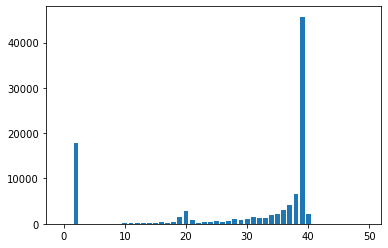

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)),h)
plt.show()

In [68]:
def max_poor_qual_cycle(qualities):  #to find which sequencing cycle has the worst quality
    min_score = 99999999999
    max_index = -1
    for i, qual in enumerate(qualities):
        score = sum(map(ord,qual))
        if min_score > score:
            min_score = score
            min_index = i
    return min_index
offset = max_poor_qual_cycle(qualities)
print("Index of worst quality : %d" %(offset))
print("Worst Quality sequence is : " + qualities[111])


Index of worst quality : 111
Worst Quality sequence is : A@A@A9@?>A45555@@46?54/5/554+588<<8FCBF#############################################################
